In [86]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

In [32]:
df = pd.read_csv('insurance.csv')
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [34]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


In [35]:
df = df.replace('?',np.NaN)

In [36]:
#df.drop(['_c39'], axis = 1,inplace=True)

In [37]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                  178
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [38]:
df['collision_type'].fillna(df['collision_type'].mode()[0], inplace = True)

df['property_damage'].fillna('NO', inplace = True)

df['police_report_available'].fillna('NO', inplace = True)

In [39]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

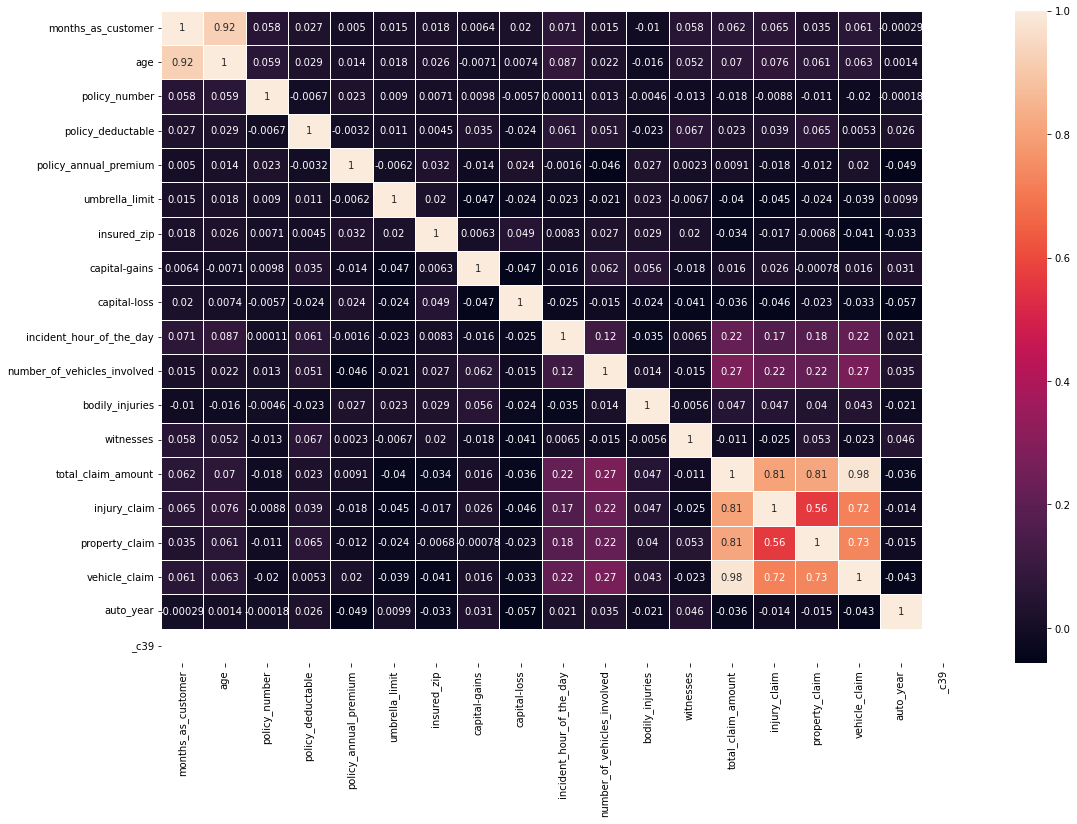

In [40]:
plt.figure(figsize = (18, 12))

corr = df.corr()

sns.heatmap(data = corr, annot = True, fmt = '.2g', linewidth = 1)
plt.show()

In [41]:
df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    3
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

In [42]:
drop_u = ['policy_number','policy_bind_date','policy_state','insured_zip','incident_location','incident_date',
           'incident_state','incident_city','insured_hobbies','auto_make','auto_model','auto_year', '_c39']

df.drop(drop_u, inplace = True, axis = 1)

In [46]:
#df['fraud_reported'] = df['fraud_reported'].replace(('Y','N'),(0,1))

In [47]:
x = df.drop('fraud_reported', axis = 1)
y = df['fraud_reported']

In [48]:
cat_df = x.select_dtypes(include = ['object'])

In [49]:
for col in cat_df.columns:
    print(f"{col}: \n{cat_df[col].unique()}\n")

policy_csl: 
['250/500' '100/300' '500/1000']

insured_sex: 
['MALE' 'FEMALE']

insured_education_level: 
['MD' 'PhD' 'Associate' 'Masters' 'High School' 'College' 'JD']

insured_occupation: 
['craft-repair' 'machine-op-inspct' 'sales' 'armed-forces' 'tech-support'
 'prof-specialty' 'other-service' 'priv-house-serv' 'exec-managerial'
 'protective-serv' 'transport-moving' 'handlers-cleaners' 'adm-clerical'
 'farming-fishing']

insured_relationship: 
['husband' 'other-relative' 'own-child' 'unmarried' 'wife' 'not-in-family']

incident_type: 
['Single Vehicle Collision' 'Vehicle Theft' 'Multi-vehicle Collision'
 'Parked Car']

collision_type: 
['Side Collision' 'Rear Collision' 'Front Collision']

incident_severity: 
['Major Damage' 'Minor Damage' 'Total Loss' 'Trivial Damage']

authorities_contacted: 
['Police' 'None' 'Fire' 'Other' 'Ambulance']

property_damage: 
['YES' 'NO']

police_report_available: 
['YES' 'NO']



In [50]:
cat_df = pd.get_dummies(cat_df, drop_first = True)

In [51]:
cat_df.head()

,policy_csl_250/500,policy_csl_500/1000,insured_sex_MALE,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_armed-forces,...,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
0,1,0,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,1,1
1,1,0,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0
4,0,1,1,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0


In [52]:
num_df = x.select_dtypes(include = ['int64'])

In [53]:
num_df.head()

,months_as_customer,age,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim
0,328,48,1000,0,53300,0,5,1,1,2,71610,6510,13020,52080
1,228,42,2000,5000000,0,0,8,1,0,0,5070,780,780,3510
2,134,29,2000,5000000,35100,0,7,3,2,3,34650,7700,3850,23100
3,256,41,2000,6000000,48900,-62400,5,1,1,2,63400,6340,6340,50720
4,228,44,1000,6000000,66000,-46000,20,1,0,1,6500,1300,650,4550


In [54]:
x = pd.concat([num_df, cat_df], axis = 1)

In [55]:
x.head()

,months_as_customer,age,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,...,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
0,328,48,1000,0,53300,0,5,1,1,2,...,1,0,0,0,0,0,0,1,1,1
1,228,42,2000,5000000,0,0,8,1,0,0,...,0,1,0,0,0,0,0,1,0,0
2,134,29,2000,5000000,35100,0,7,3,2,3,...,0,1,0,0,0,0,0,1,0,0
3,256,41,2000,6000000,48900,-62400,5,1,1,2,...,0,0,0,0,0,0,0,1,0,0
4,228,44,1000,6000000,66000,-46000,20,1,0,1,...,0,1,0,0,0,1,0,0,0,0


In [56]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

In [57]:
x_train.head()

,months_as_customer,age,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,...,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
206,128,32,2000,0,0,-39300,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
59,151,36,2000,0,94800,-58500,12,3,1,1,...,1,1,0,0,0,0,0,1,0,0
918,180,36,500,0,0,0,7,3,2,1,...,0,1,0,0,0,0,0,0,1,0
495,261,46,1000,0,0,-49400,19,1,0,3,...,0,1,0,0,0,0,1,0,0,0
796,421,56,500,4000000,49500,-81100,7,1,2,3,...,0,0,0,0,0,0,0,0,0,0


In [59]:
num_df = x_train[['months_as_customer', 'policy_deductable', 'umbrella_limit',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'injury_claim', 'property_claim',
       'vehicle_claim']]

In [60]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(num_df)

In [62]:
scaled_num_df = pd.DataFrame(data = scaled_data, columns = num_df.columns, index = x_train.index)
scaled_num_df.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim
206,-0.671565,1.434796,-0.484052,-0.931006,-0.465204,-1.694515,-0.821285,0.000000,-1.328861,-0.293797,-0.288909,0.525744
59,-0.472139,1.434796,-0.484052,2.497004,-1.154829,0.040681,1.149799,0.000000,-0.438204,0.817006,-0.343452,0.415310
918,-0.220687,-1.025792,-0.484052,-0.931006,0.946371,-0.682317,1.149799,1.210307,-0.438204,1.065207,-0.215486,0.674406
495,0.481642,-0.205596,-0.484052,-0.931006,-0.827976,1.052878,-0.821285,-1.210307,1.343112,1.211686,1.263463,0.827315
796,1.868958,-1.025792,1.299924,0.858936,-1.966574,-0.682317,-0.821285,1.210307,1.343112,1.919671,0.225052,1.566377


In [63]:
x_train.drop(columns = scaled_num_df.columns, inplace = True)

In [65]:
x_train = pd.concat([scaled_num_df, x_train], axis = 1)

In [66]:
x_train.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,...,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
206,-0.671565,1.434796,-0.484052,-0.931006,-0.465204,-1.694515,-0.821285,0.000000,-1.328861,-0.293797,...,0,0,1,0,1,0,0,0,0,0
59,-0.472139,1.434796,-0.484052,2.497004,-1.154829,0.040681,1.149799,0.000000,-0.438204,0.817006,...,1,1,0,0,0,0,0,1,0,0
918,-0.220687,-1.025792,-0.484052,-0.931006,0.946371,-0.682317,1.149799,1.210307,-0.438204,1.065207,...,0,1,0,0,0,0,0,0,1,0
495,0.481642,-0.205596,-0.484052,-0.931006,-0.827976,1.052878,-0.821285,-1.210307,1.343112,1.211686,...,0,1,0,0,0,0,1,0,0,0
796,1.868958,-1.025792,1.299924,0.858936,-1.966574,-0.682317,-0.821285,1.210307,1.343112,1.919671,...,0,0,0,0,0,0,0,0,0,0


In [67]:
#import seaborn as sns
#ax = sns.countplot(x='fraud_reported', data=df)
#print(df['fraud_reported'].value_counts())

In [68]:
#df['fraud_reported'].value_counts()

In [69]:
#import seaborn as sns
#ax = sns.countplot(x='incident_state', data=df)
#print(df['incident_state'].value_counts())

In [70]:
#import matplotlib.pyplot as plt
#plt.style.use('_mpl-gallery')
#fig = plt.figure(figsize=(18,8))
#ax = df.groupby('incident_date').total_claim_amount.count().plot.bar(ylim=0)
#ax.set_ylabel('Claim amount ($)')
#ax.set_xlabel('Incident Date')
#plt.show()

In [71]:
#import matplotlib.pyplot as plt
#plt.style.use('_mpl-gallery')
#fig = plt.figure(figsize=(18,8))
#ax = df.groupby('policy_state').total_claim_amount.count().plot.bar(ylim=0)
#ax.set_ylabel('Claim amount ($)')
#ax.set_xlabel('Policy State')
#plt.show()

In [72]:
#df[['insured_zip']] = df[['insured_zip']].astype(object)

In [73]:
#df.select_dtypes(include=['object']).columns

In [75]:
#df = df.drop(columns = ['policy_number', 'policy_csl', 'insured_zip', 'policy_bind_date', 'incident_date', 
#                        'incident_location', 'auto_year', 'incident_hour_of_the_day'])

#df.head()


In [76]:
#df['fraud_reported'] = df['fraud_reported'].replace(('Y','N'),(0,1))

In [77]:
#df[['auto_model','fraud_reported']].groupby(['auto_model'], 
#                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

In [84]:
lr=LogisticRegression()
lr.fit(x_train, y_train)
predlr = lr.predict(x_test)
print('Accuracy Score : {}'.format(accuracy_score(y_test, predlr)*100))
print('f1_score: {}'.format(f1_score(y_test, predlr)*100))
print(confusion_matrix(y_test, predlr))
print(classification_report(y_test, predlr))

Accuracy Score : 71.2
f1_score: 83.17757009345796
[[  0  69]
 [  3 178]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        69
           1       0.72      0.98      0.83       181

    accuracy                           0.71       250
   macro avg       0.36      0.49      0.42       250
weighted avg       0.52      0.71      0.60       250



In [88]:
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
predrfc = rfc.predict(x_test)
print('Accuracy Score : {}'.format(accuracy_score(y_test, predlr)*100))
print('f1_score: {}'.format(f1_score(y_test, predlr)*100))
print(confusion_matrix(y_test, predlr))
print(classification_report(y_test, predlr))

Accuracy Score : 71.2
f1_score: 83.17757009345796
[[  0  69]
 [  3 178]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        69
           1       0.72      0.98      0.83       181

    accuracy                           0.71       250
   macro avg       0.36      0.49      0.42       250
weighted avg       0.52      0.71      0.60       250



In [ ]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)
predgnb = gnb.predcit(x_test)
print('Accuracy Score : {}'.format(accuracy_score(y_test, predlr)*100))
print('f1_score: {}'.format(f1_score(y_test, predlr)*100))
print(confusion_matrix(y_test, predlr))
print(classification_report(y_test, predlr))